# Sheet 6: Clustering and Similarity Graphs

## Question 1

Points = $\{1,2,8,9\}$. initial assignment of K-means is two means with values $\mu_1=0$ and $\mu_2=3$.

Iteration 1:

Assignment: Point 1 gets assigned to cluster 1 and Points 2, 8, 9 gets assigned to cluster 2. Based on the Euclidean distance.

Update: new value of $\mu_1 = \frac{1}{1} = 1$, new value of $\mu_2=\frac{2 + 8 + 9}{3} = 6.33$

Iteration 2:

Assignment: Points 1 and 2 gets assigned to cluster 1 and Points 8 and 9 gets assigned to cluster 2. Based on the distance to the new cluster means

Update: new value of $\mu_1 = \frac{1 + 2}{2} = 1.5$, new value of $\mu_2=\frac{8 + 9}{2} = 8.5$

Iteration 3:

Assignment: Points 1 and 2 gets assigned to cluster 1 and Points 8 and 9 gets assigned to cluster 2. Based on the distance to the new cluster means

Update: new value of $\mu_1 = \frac{1 + 2}{2} = 1.5$, new value of $\mu_2=\frac{8 + 9}{2} = 8.5$. There is no change in the values of cluster means so the algorithm terminates 

Reconstruction loss = $(1-1.5)^2 + (2-1.5)^2 + (8-8.5)^2 + (9-8.5)^2 = 1$

## Question 2
implementation of K-means in python

In [1]:
import numpy as np
from scipy.spatial.distance import cityblock
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
data = np.array([[0.5,4.5,2.5],[2.2,1.5,0.1],[3.9,3.5,1.1],[2.1,1.9,4.9],[0.5,3.2,1.2],[0.8,4.3,2.6],[2.7,1.1,3.1],[2.5,3.5,3.8],[2.8,3.9,1.5],[0.1,4.1,2.9]])

In [3]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def manhattan_distance(point1, point2):
    return cityblock(point1, point2)

def k_means(X, k, distance_fn=euclidean_distance, max_iterations=100):
    n_dims = X.shape[1]
    
    # randomly initialize k centroids
    u_curr = np.array([np.random.random(n_dims) for i in range(k)])
    u_next = np.zeros(k)
    cluster_assignment = dict([(i, []) for i in range(k)])
    for point in X:
        cluster_assignment[np.random.randint(0, high=k)].append(point)
    
    eps = 0.01
    for i in range(max_iterations):
        
        for point in X:
            cluster = np.argmin(
                [distance_fn(point, u_i) for u_i in u_curr])
            cluster_assignment[cluster].append(point)
        
        # centroid update
        u_next = np.array(
            [np.mean(cluster_assignment[i],axis = 0) for i in range(k)])
        
        pos_update = sum([distance_fn(u_next[i], u_curr[i]) for i in range(k)])
        if pos_update < eps:
            return u_next, cluster_assignment
        
        u_curr = u_next
        cluster_assignment = dict([(i, []) for i in range(k)])
        
    return u_next, cluster_assignment

<IPython.core.display.Javascript object>


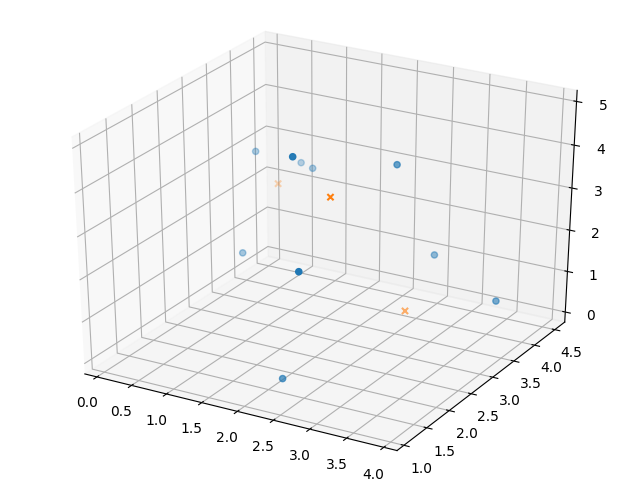

In [4]:
# no feature scaling, euclidean distance
centroids, assignments = k_means(data, 3)

%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], marker='o')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],marker='x')

<IPython.core.display.Javascript object>


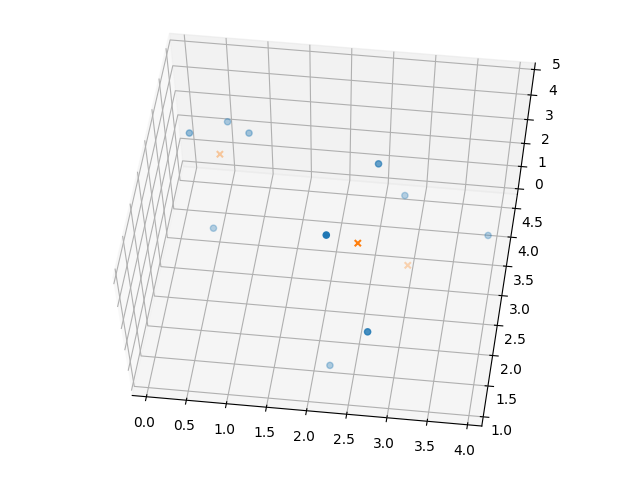

In [10]:
# no feature scaling, manhattan distance
centroids, assignments = k_means(data, 3, distance_fn=manhattan_distance)

%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], marker='o')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],marker='x')

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
X_scaled = MinMaxScaler().fit_transform(data)

<IPython.core.display.Javascript object>


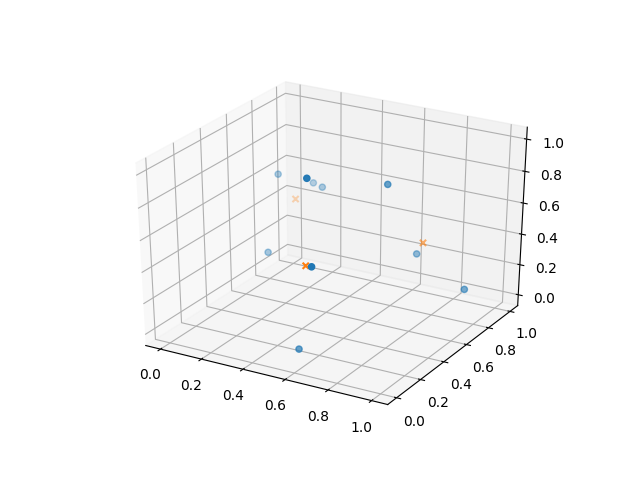

In [7]:
# feature scaling, euclidean distance
centroids, assignment = k_means(X_scaled, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], marker='o')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='x')

<IPython.core.display.Javascript object>


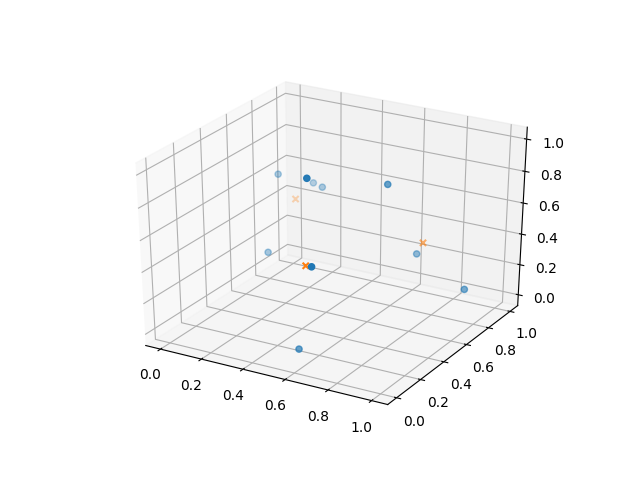

In [8]:
# feature scaling, manhattan distance
centroids, assignment = k_means(X_scaled, 3, distance_fn=manhattan_distance)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], marker='o')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='x')